# Digital signal processing - 7

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Author ** | Alexander Kapitanov |
| ** Contact ** | sallador@bk.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, as well as knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of the program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

## Window functions

For analog signals or for an infinite time discrete sinusoidal signal, its spectrum is the delta function at the frequency of this signal. In practice, the spectrum of a real time-limited harmonic signal is equivalent to the function ~ $ \frac {sin (x)} {x} = sinc (x) $, and the width of the main lobe depends on the duration of the $ T $ signal analysis interval. The time limit is nothing more than the multiplication of a signal by a rectangular envelope.

From previous lectures, we learned that the multiplication of signals in the time domain is a convolution of their spectra in the frequency domain (and vice versa: the convolution of signals in the time domain is the product of their spectra). Therefore, the spectrum of the bounded rectangular envelope of the harmonic signal is equivalent to ~ $ sinc (x) $. This is also due to the fact that we cannot integrate the signal over an infinite time interval, and the Fourier transform in discrete form, expressed through a finite sum, is limited in terms of the number of samples.

Typically, the length of the FFT in modern digital processing devices ranges from $ N_ {FFT} $ from 8 to several million points. By limiting the signal on the $ N $ interval, we thereby impose a rectangular "window" with a duration of $ N $ samples. Therefore, the resulting spectrum is the spectrum of the multiplied harmonic signal and the rectangular envelope.

Let's move on to an example. Let's construct the spectrum of a short harmonic signal with the following parameters: signal length $ N = 256 $, FFT length - $ N_ {FFT} = 2048 $. For clarity, the spectrum graph is presented on a logarithmic scale.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

%matplotlib inline

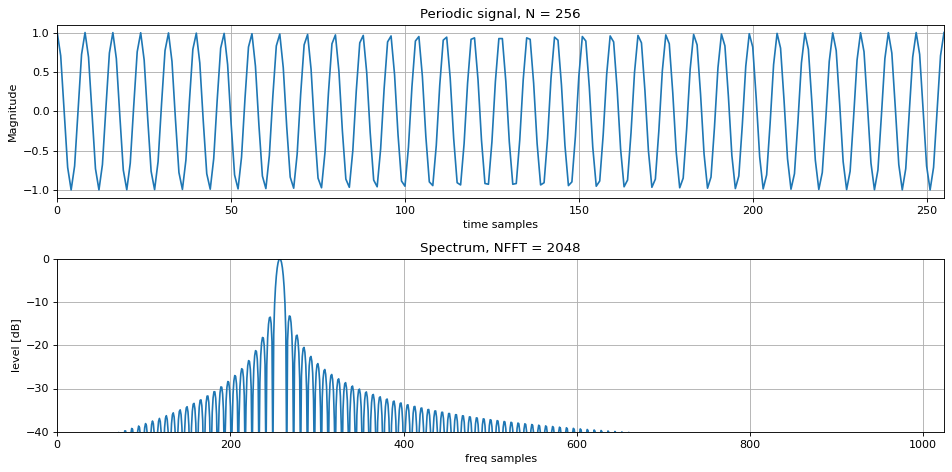

In [2]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

As you can see, the spectrum of a short harmonic signal in real life is not equivalent to a delta function, but is similar to the convolution of the spectra of a rectangular signal and a harmonic signal. The graph shows the first half of the frequency domain. The final signal is symmetrical about half the sample rate or $ N_ {FFT} / 2 $.

Recall that the spectrum of a rectangular signal is equivalent to the expression ~ $ \frac {sin (x)} {x} = sinc (x) $. That is, at the frequency of the signal, the spectrum of a rectangular window is as if "superimposed on the delta function. With an increase in the duration of a harmonic signal in the time domain, its spectrum tends to the delta function at the frequency of this signal, and the effect of the rectangular window decreases.

That is, limiting the signal in time leads to the imposition of a rectangular "window". In the example below, the signal duration is significantly increased ($ N = 65536 $. As you can see, the spectrum of such a signal tends to the delta function.

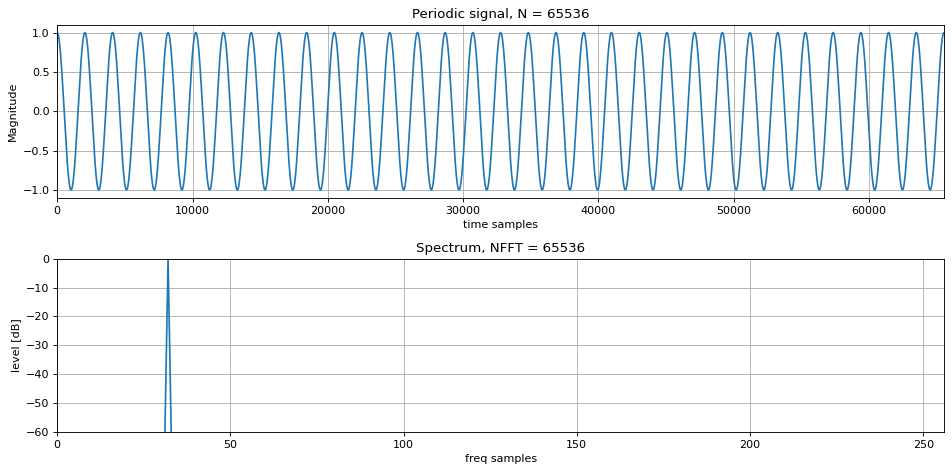

In [3]:
# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

Unfortunately, in real life and in practice, the use of endless signals is impossible and laborious:

- Very long signals require large amounts of memory to store the values.
- Long signals contain more energy than short signals, all other things being equal, which in turn makes it difficult to transmit and receive such signals.
- Long signals require more computational resources to process them (convolution, filtering, Fourier transform).
- Long pulses are subject to greater distortion than short pulses due to the increased propagation time in the physical environment.

When the signal is multiplied by a rectangular window (truncation of a long sequence to a real signal), the so-called “spectrum spreading” or “spectrum blurring” effect occurs. The main problem with spectrum blur is that the side lobes of a stronger signal can hide weak signals. It will be shown below how to reduce the influence of spectrum spreading using window functions.

### Window functions

In problems of digital signal processing, windows of various shapes have been invented, which, when superimposed on a signal in the time domain, can qualitatively improve its spectral characteristics. A large number of all kinds of windows is primarily due to one of the main features of any window overlay. This feature is expressed in the relationship between the level of the side lobes and the width of the central lobe.

** Rule: the stronger the suppression of the side lobes of the spectrum, the wider the main lobe of the spectrum, and vice versa **

Imagine a signal that is split into several sequences, each of which is processed independently, and then stitched into a single signal. When calculating the FFT, a rectangular window is superimposed. Consequently, the subsequent restoration of the waveform will lead to undesirable effects, which are expressed in waveform distortion at the joints (signal bursts). In order to smooth out these bursts, window filtering can be applied.

One of the uses of windowing functions is to detect weak signals against the background of stronger ones by suppressing the level of side lobes. The main window functions in DSP problems are ** triangular, sinusoidal, Lanczos, Hann, Hamming, Blackman, Harris, Blackman-Harris windows, flat top window, Natall, Gauss, Kaiser window ** and many others. Most of them are expressed through a finite series by summing harmonic signals with certain weights. Such signals are perfectly implemented in practice on any hardware device (programmable logic circuits or signal processors).

Complex windows are calculated by taking an exponent (Gaussian window) or a modified Bessel function (Kaiser window). Such window functions are more difficult to implement in integrated circuits (to calculate exponential functions or Bessel functions, a coding table from one value to another is required).

### Suppression factor

Obviously, when the signal is multiplied by the window function, the amplitude of the resulting oscillation changes. In DSP problems, the concept of an attenuation coefficient is introduced, which characterizes the suppression of a signal in the process of window filtering in comparison with a rectangular window. Formula for calculating the attenuation coefficient:

$ \beta = \frac {A_ {w}} {A_ {r}} \cdot \frac {1} {N} \sum_ {n = 0} ^ {N-1} w (n) $,

Where:
- $ A_ {w} $ - constant component level of the window function,
- $ A_ {r} $ - the level of the constant component of the rectangular window,
- $ w (n) $ - window function counts,
- $ N $ - length of the window function.

With python, let's pre-define a function that displays window functions:

In [4]:
def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(12, 6), dpi=80)
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

### Basic window functions


Following are the expressions for the basic window functions. The duration of the window function is $ N $, $ w (n) $ are the counts of the window function. All well-known windows are available in the Python library `scipy` in the `signal` package. Their challenge is simple enough. Further, in the form of a table and graphs, the comparative efficiency of various windows will be shown.

** Rule: the sum of the modules of the window function coefficients is equal to one! **


** Rectangular window **

$ w (n) = 1 $

The simplest window has the worst characteristics and is obtained automatically when the sequence is truncated to $ N $ samples. Maximum side lobe level (LBL) of the frequency response of a rectangular window: ** - 13 dB **.

Python: `signal.boxcar(M)`

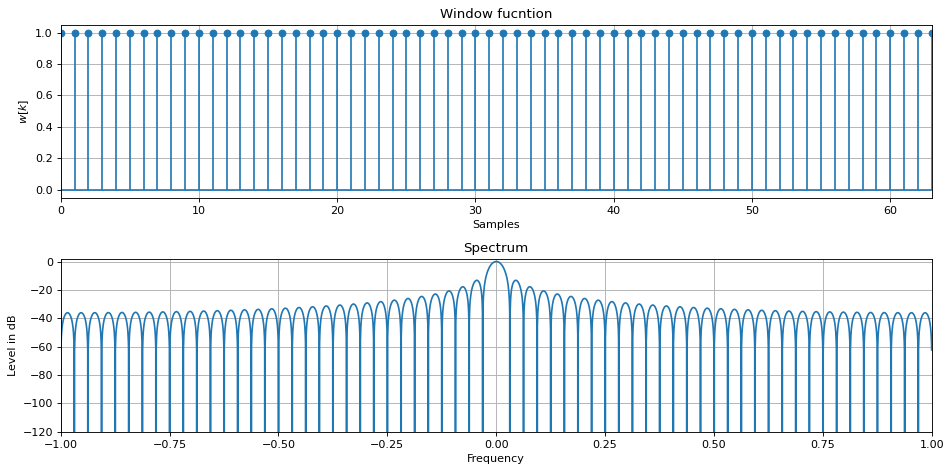

In [5]:
N = 64
dft_win(np.ones(N))

** Triangular window **

Also known as Bartlet's window.

$ w(n) = 1 - \frac {n - N / 2} {L / 2} $

Where

$ L = N, N + 1, N + 2 $

Maximum sidelobe level: ** - 26 dB **.

Python: `signal.triang(M)` or `bartlett(M)`

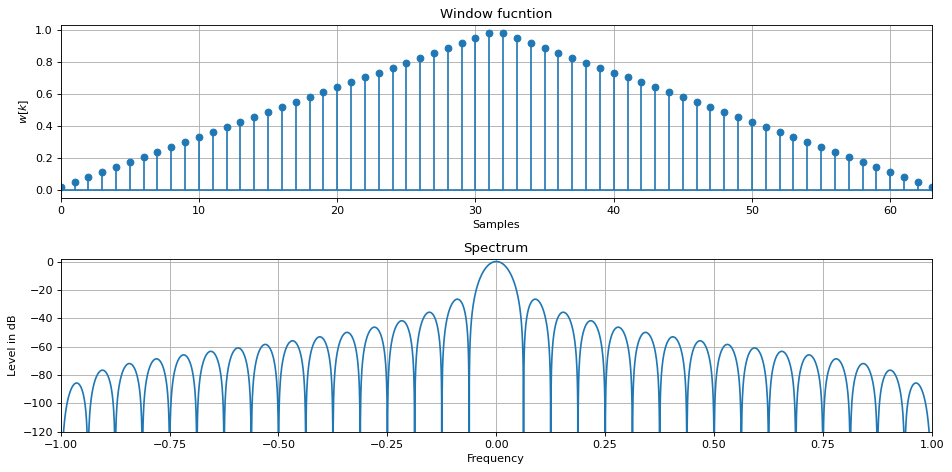

In [6]:
N = 64
dft_win(sig.triang(N))

**Sinus**

$ w (n) = sin (\frac {\pi \cdot n} {N-1}) $

A simple window in terms of software and hardware implementation. The maximum level of the side lobes of the sinusoidal window: ** - 23 dB **.

Python: `signal.cosine(M)`

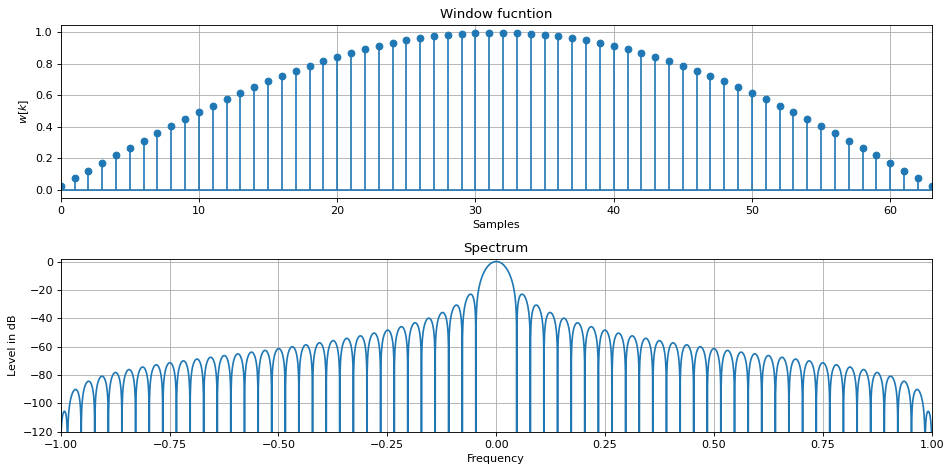

In [7]:
N = 64
dft_win(sig.cosine(N))

** Hannah (Henning) Window **

$ w (n) = 0.5 \cdot [1 - cos (\frac {2 \pi n} {N-1})] $

This window is also called the second order Blackman-Harris window. Maximum level of sinusoidal window side lobes: ** - 31.5 dB **.

Python: `signal.hann(M)` and `signal.hanning(M)`

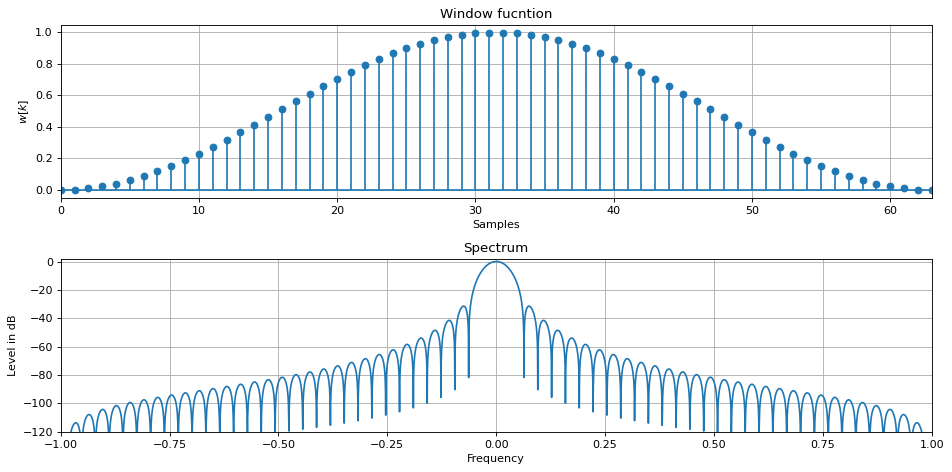

In [8]:
N = 64
dft_win(sig.hann(N))

** Hemming Window **

$ w (n) = 0.53836 - 0.46164 \cdot cos (\frac {2 \pi n} {N-1}) $

Maximum sidelobe level: ** - 42 dB **.

Python: `signal.hamming(M)`

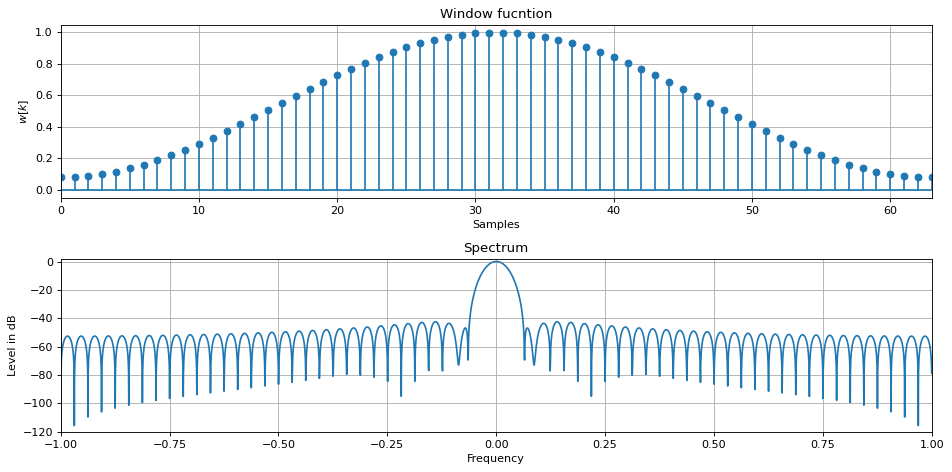

In [9]:
N = 64
dft_win(sig.hamming(N))

** Blackman Window **

$ w (n) = a_0 - a_1 \cdot cos (\frac {2 \pi n} {N-1}) + a_2 \cdot cos (\frac {4 \pi n} {N-1}) $

Where

$ a_0 = \frac {1- \alpha} {2}; a_1 = 0.5; a_2 = 0.5 \cdot \alpha $

At $ \alpha = 0.16 $, the maximum sidelobe level is ** - 58 dB **.

Python: `signal.blackman(M)`

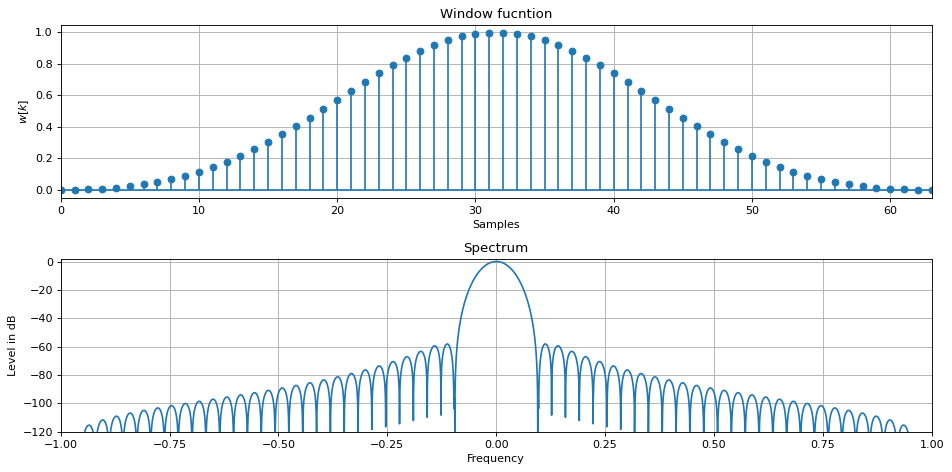

In [10]:
N = 64
dft_win(sig.blackman(N))

** Blackman-Harris Window **

It is set by the sum of four terms (that is, a fourth-order window).

$ w (n) = a_0 - a_1 \cdot cos (\frac {2 \pi n} {N-1}) + a_2 \cdot cos (\frac {4 \pi n} {N-1}) - a_3 \cdot cos (\frac {6 \pi n} {N-1}) $

Where

$ a_0 = 0.35875, a_1 = 0.48829, a_2 = 0.14128, a_3 = 0.01168 $

Maximum sidelobe level: ** - 92 dB **.

Python: `signal.blackmanharris(M)`

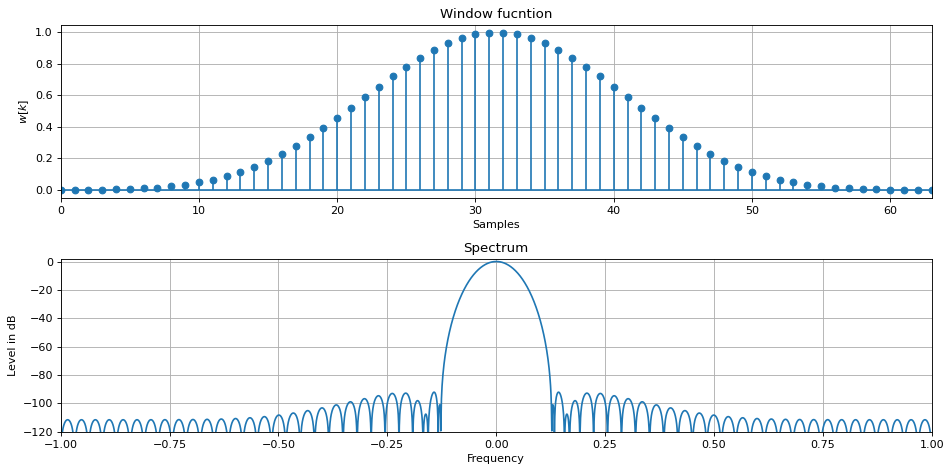

In [11]:
N = 64
dft_win(sig.blackmanharris(N))

** Blackman-Natall Window **

The formula is similar to the Blackman-Harris window. The only difference is in the coefficients. It is given by the sum of four terms.

$ w (n) = a_0 - a_1 \cdot cos (\frac {2 \pi n} {N-1}) + a_2 \cdot cos (\frac {4 \pi n} {N-1}) - a_3 \cdot cos (\frac {6 \pi n} {N-1}) $

Where

$ a_0 = 0.3635819, a_1 = 0.4891775, a_2 = 0.1365995, a_3 = 0.0106411 $

Maximum sidelobe level: ** - 93 dB **.

Python: `signal.nuttall(M)`

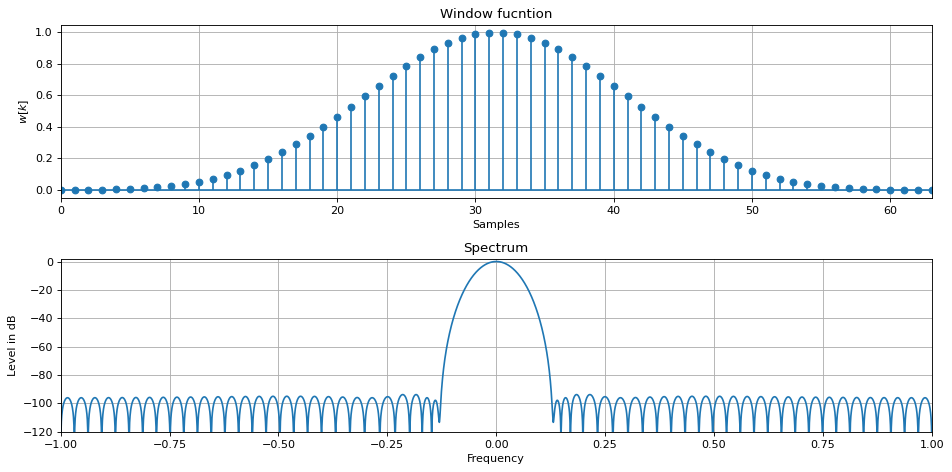

In [12]:
N = 64
dft_win(sig.nuttall(N))

** Flat top window **

Flat-top window.

$ w (n) = a_0 - a_1 \cdot cos (\frac {2 \ pi n} {N-1}) + a_2 \cdot cos (\frac {4 \pi n} {N-1}) - a_3 \cdot cos (\frac {6 \pi n} {N-1}) + a_4 \cdot cos (\frac {8 \pi n} {N-1}) $

Where

$ a_0 = 0.21556895, $

$ a_1 = 0.41663158, $

$ a_2 = 0.277263158, $

$ a_3 = 0.083578947, $

$ a_4 = 0.0069474 $

Maximum sidelobe level: ** - 70 dB **.

Python: `signal.flattop(M)`

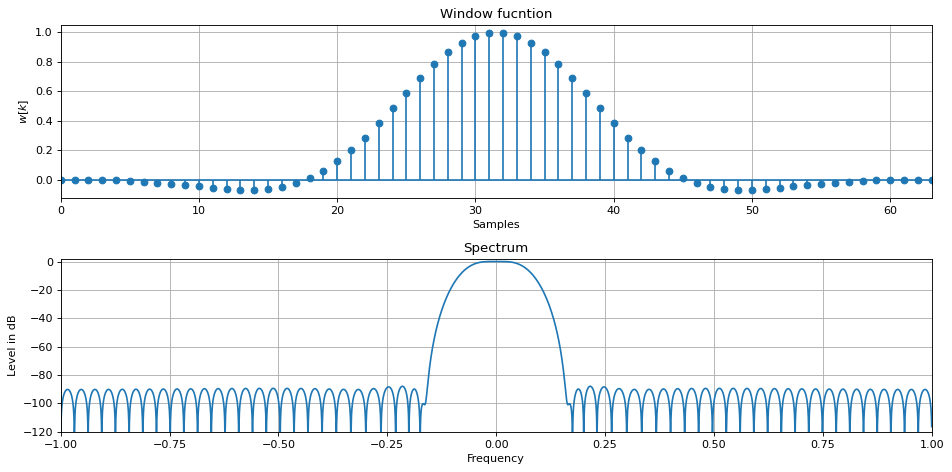

In [13]:
N = 64
dft_win(sig.flattop(N))

** Kaiser Window **

Kaiser window. Varies with the $ \beta $ parameter, which determines the attenuation level and the slope of the frequency response. The Kaiser window is a kind of universal window with which you can select certain filtering parameters for a wide class of tasks.

$ w (n) = \frac {| I_ {0} \sqrt {1 - (\frac {2n-N + 1} {N-1}) ^ 2} |} {| I_ {0} (\beta) |} $

Where

- $ I_ {0} $ - modified Bessel function of the first kind of zero order.
- $ \beta $ is a coefficient that determines the fraction of energy concentrated in the main lobe of the window function spectrum.

The larger the $ \beta $, the greater the energy fraction inside the main lobe, and the wider the main lobe. Therefore, the lower the sidelobe level (better suppression in filtering tasks). In practice, the Kaiser function in the hardware is practically not implemented, but it is applied in software (calculation of the FIR filter coefficients). In real-world problems, the values ​​$ \beta $ from 5 to 11 are used.

Python: `signal.kaiser (M, beta)`

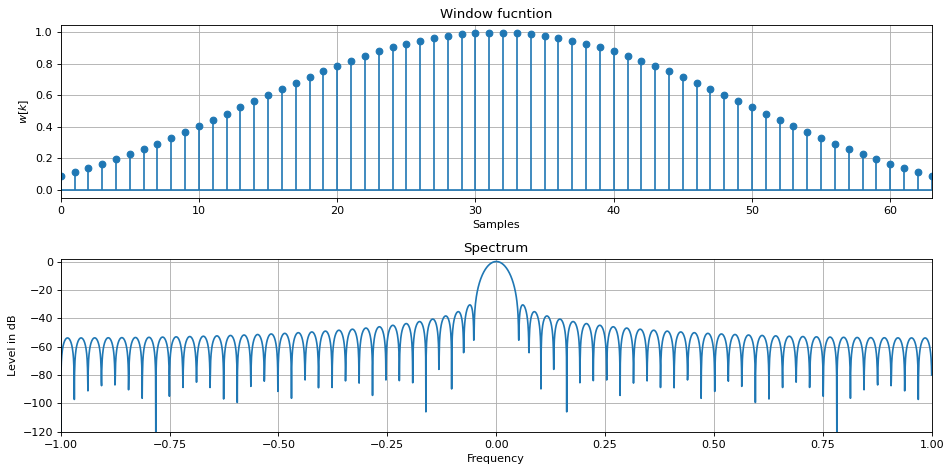

In [14]:
N = 64
dft_win(sig.kaiser(N, beta=4))

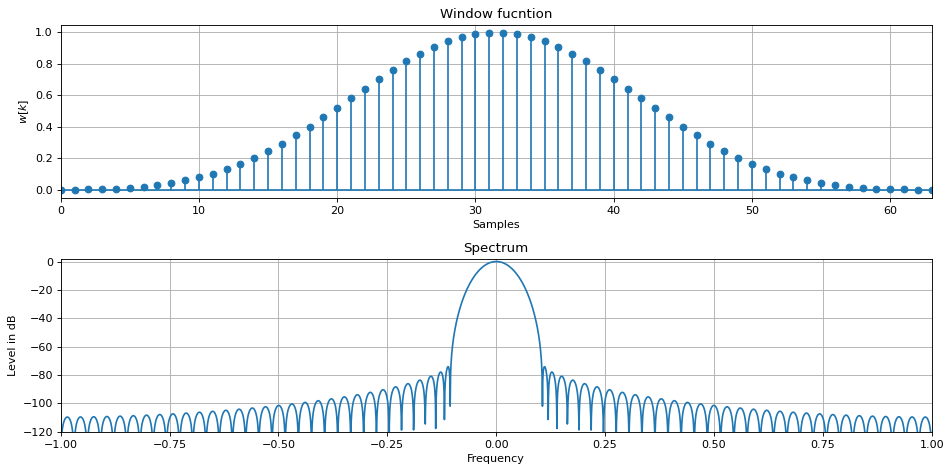

In [15]:
N = 64
dft_win(sig.kaiser(N, beta=10))

** Gaussian Window **

The Gaussian window is set by an exponential function and is varied by the variance (standard deviation) parameter.

$ w (n) = e ^ {- \frac {1} {2} (\frac {n} {\sigma}) ^ {2}} $


The frequency properties of the window depend on the $ \sigma $ parameter.

The larger the $ \sigma $, the narrower the main lobe, but the higher the level of the side lobes (worse suppression).

In practice, the Gaussian window is practically not implemented in the hardware, but it is used in software, for example, in the problems of calculating the coefficients of an FIR filter.

Python: `signal.gaussian(M, std)`

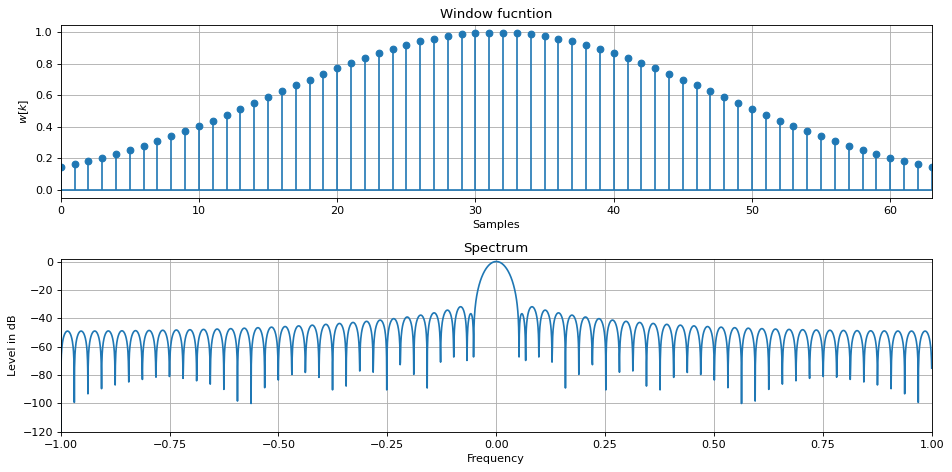

In [16]:
N = 64
dft_win(sig.gaussian(N, std=16))

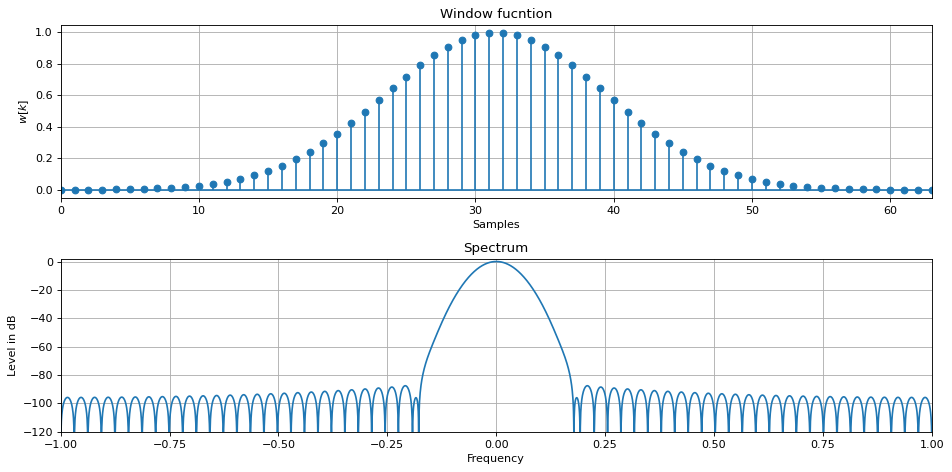

In [17]:
N = 64
dft_win(sig.gaussian(N, std=8))

We've covered basic windowing functions.

### numpy window functions

The python package numpy has a limited set of window functions.

- bartlett(M) - triangular function,
- blackman(M) - Blackman function,
- hamming(M) - Hamming window,
- hanning(M) - Hanning or Hannah window,
- kaiser(M, beta) - Kaiser window.
____

Unlike numpy, the scipy package extends the windowing filtering capabilities, and, as seen in the examples above, complements the functionality. Here is a list of the main functions from the `scipy.signal` package

### scipy window functions

| ** Function ** | ** Description ** | ** Side-Lobe Level ** |
| --- | --- | --- |
| `boxcar(M [, sym])` | Rectangular Window | 13 |
| `triang(M [, sym])` | Triangular window | 26 |
| `bartlett(M [, sym])` | Triangular Window (Bartlett) | 26 |
| `cosine(M [, sym])` | Cosine window | 23 |
| `hann(M [, sym])` | Hannah (Henning) Window | 31.5 |
| `hanning(M [, sym])` | Henning's Window (Hannah) | 31.5 |
| `hamming(M [, sym])` | Hamming Window | 42 |
| `blackman(M [, sym])` | Blackman Window | 58 |
| `blackmanharris(M [, sym])` | Blackman-Harris Function | 92 |
| `nuttall(M [, sym])` | Nattal Window | 93 |
| `flattop(M [, sym])` | Flat top window | 70 |
| `kaiser(M, beta [, sym])` | Kaiser function (parameter - $ \beta $) | $ f (\beta) $ |
| `gaussian(M, std [, sym])` | Gaussian function (parameter - $ \sigma $) | $ f (\sigma) $ |

## Basic window functions

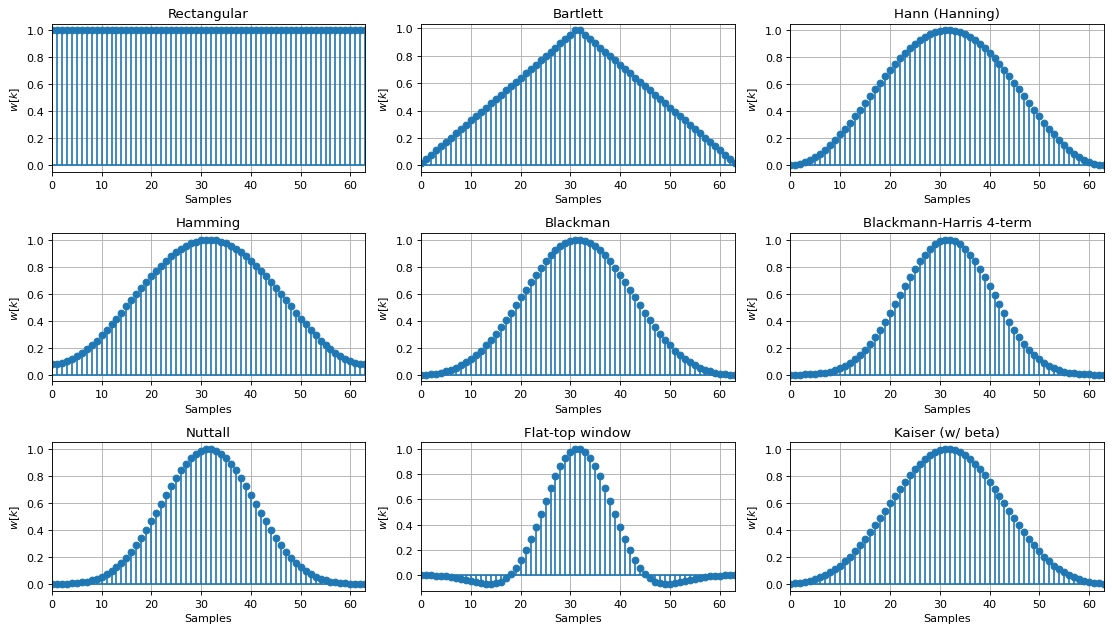

In [18]:
N = 64
# All windows
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = sig.triang(N)
ww[:,2] = sig.hann(N)
ww[:,3] = sig.hamming(N)
ww[:,4] = sig.blackman(N)
ww[:,5] = sig.blackmanharris(N)
ww[:,6] = sig.nuttall(N)
ww[:,7] = sig.flattop(N)
ww[:,8] = sig.kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)', 
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term', 
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot window function and its spectrum
fig = plt.figure(figsize=(14, 8), dpi=80)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], use_line_collection=True, basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()

## Spectra of basic window functions

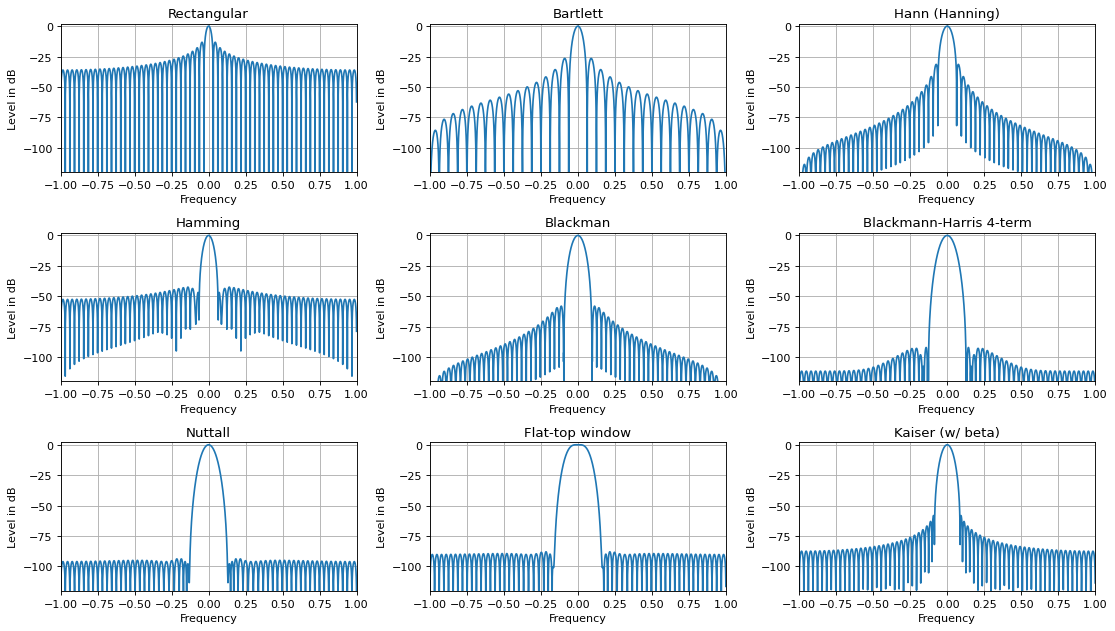

In [19]:
NFFT = 2**12
# Calculate FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot window function and its spectrum
fig2 = plt.figure(figsize=(14, 8), dpi=80)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()

## Finding weak signals

It was said earlier that with the help of window filtering it is possible to distinguish weak signals against the background of stronger ones. We will prove this by plotting the sum of two harmonic signals located close to each other in frequency and significantly differing in amplitude.

The following graph shows the spectrum without window filtering (the window is rectangular) and with filtering the input signal by the Kaiser window with the given parameter $ beta = 7 $

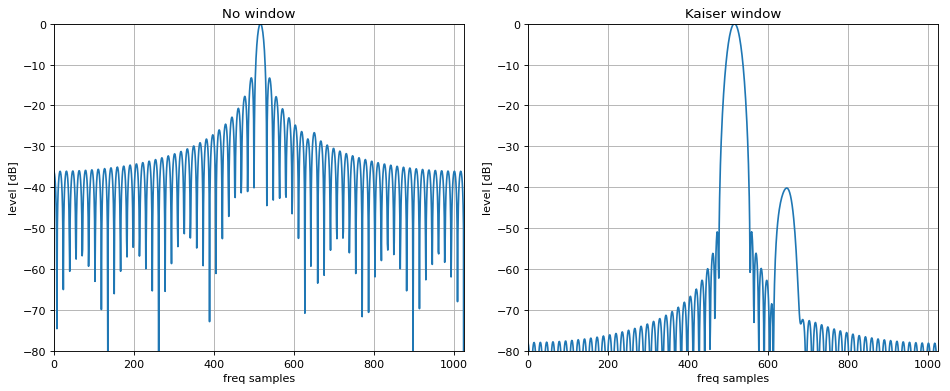

In [20]:
# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Window (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(12, 5), dpi=80)
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

As you can see in the previous figure, without a window function, it is almost impossible to distinguish between a weak signal and a strong one. However, using a window function with good suppression properties, it is possible to detect a weak signal against a strong background!